# Imports

In [1]:
import os
import numpy as np
import torchvision

import torch
import matplotlib.pyplot as plt

from realnvp import RealNVP

# MNIST data loading

Data stored in ./data/MNIST

In [2]:
os.makedirs("data", exist_ok=True)

In [3]:
def uniform_quantization(img):
    return (img*255+torch.rand(img.size()))/256

def rescale_logit(img,lambd=1e-6):
    ## logit space
    return torch.logit(lambd+(1-2*lambd)*img)

In [4]:
transform = torchvision.transforms.Compose([
                torchvision.transforms.ToTensor(),
                uniform_quantization,
                rescale_logit,
                torchvision.transforms.Lambda(lambd=torch.flatten)])

mnist_train = torchvision.datasets.MNIST(root="data", download=True, transform=transform, train=True)
mnist_test = torchvision.datasets.MNIST(root="data", download=True, transform=transform, train=False)

Sanity check for the data:

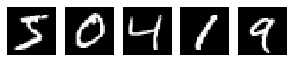

In [5]:
n_examples = 5
fig, axes = plt.subplots(nrows=1, ncols=n_examples, figsize=(n_examples, 1))

for i in range(n_examples):
    axes[i].imshow(mnist_train.data[i], cmap="gray")
    axes[i].axis('off')

plt.show()

In [6]:
batch_size = 128

trainloader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=1)
testloader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=1)

In [7]:
mnist_train.data[0].shape

torch.Size([28, 28])

In [8]:
d = 28
D = d ** 2

# RealNVP 

number of params:  4629520


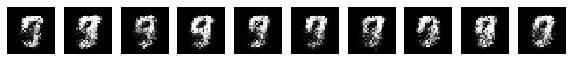

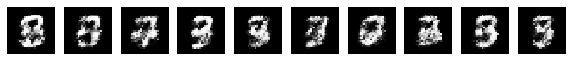

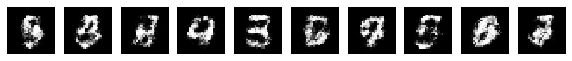

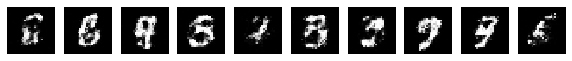

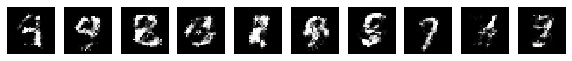

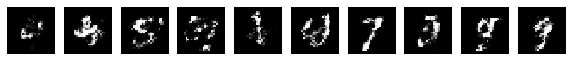

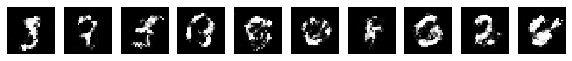

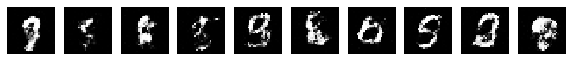

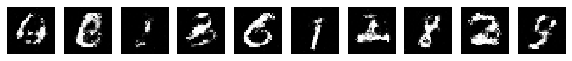

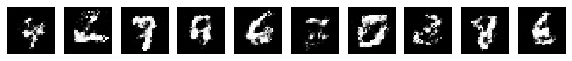

In [9]:
realnvp = RealNVP(D)
realnvp.train(trainloader)

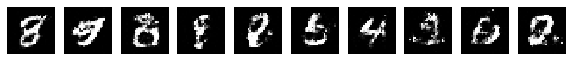

In [10]:
realnvp.plot_generations()